In [166]:
import numpy as np
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.linear_model import LogisticRegression
import sklearn.pipeline
from cross_validation import train_models_and_calc_scores_for_n_fold_cv
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import matplotlib.pyplot as plt

In [167]:
data_dir='./data_reviews'

# read in training data
x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))

# create a list of all reviews
x_text_list = x_train_df.values[:,1]
x_text_list = x_text_list.tolist()

vectorizer = CountVectorizer(stop_words="english")

# fit_transform will make its own vocabular from the text
x = vectorizer.fit_transform(x_text_list)  
x_train_NV = x.toarray()

# export vocabulary
vocabulary = vectorizer.vocabulary_
with open('vocab.pkl','wb') as f:
    pickle.dump(vocabulary,f)

# x_train_NV.shape

In [168]:
test = CountVectorizer()
x = test.fit_transform(["1", "bad cat apple", "big10"])
test.vocabulary_

{'bad': 1, 'cat': 3, 'apple': 0, 'big10': 2}

In [169]:

clf = LogisticRegression()

# C is hyperparam for regularization
param_grid = {"C": np.logspace(-10,6,17),
                "penalty": ["l2"],
                "tol": [1e-3],
                "solver" : ["lbfgs"]}
                # "fit_intercept" : [True]}


# by default,um folds is 5
search = HalvingGridSearchCV(clf, param_grid,cv=5, random_state=0).fit(x_train_NV, y_train_df)

/home/will/anaconda3/envs/cs135_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/anaconda3/envs/cs135_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/anaconda3/envs/cs135_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/anaconda3/envs/cs135_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

In [170]:
len(np.logspace(-10,6,17))

17

In [171]:
print(search.best_params_)
#print(search.cv_results_['split0_test_score'])
#print(search.cv_results_['params'])

indices = []
for index, dict in enumerate(search.cv_results_['params']):
    if dict['tol'] == search.best_params_['tol']:
        indices.append(index)

# print(indices)
# for idx in indices:
#     print(search.cv_results_['params'][idx])

indices = indices[0:17]
test_scores = []
train_scores = []
test_split0, train_split0, test_split1, train_split1, test_split2, train_split2, test_split3, train_split3, test_split4, train_split4 = ([] for i in range(10))
for idx in indices:
    test_scores.append(search.cv_results_['mean_test_score'][idx])
    train_scores.append(search.cv_results_['mean_train_score'][idx])
    test_split0.append(search.cv_results_['split0_test_score'][idx])
    train_split0.append(search.cv_results_['split0_train_score'][idx])
    test_split1.append(search.cv_results_['split1_test_score'][idx])
    train_split1.append(search.cv_results_['split1_train_score'][idx])
    test_split2.append(search.cv_results_['split2_test_score'][idx])
    train_split2.append(search.cv_results_['split2_train_score'][idx])
    test_split3.append(search.cv_results_['split3_test_score'][idx])
    train_split3.append(search.cv_results_['split3_train_score'][idx])
    test_split4.append(search.cv_results_['split4_test_score'][idx])
    train_split4.append(search.cv_results_['split4_train_score'][idx])

print(test_scores)
print(train_scores)

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
[0.6037735849056604, 0.6037735849056604, 0.539622641509434, 0.539622641509434, 0.539622641509434, 0.539622641509434, 0.539622641509434, 0.539622641509434, 0.6037735849056604, 0.6490566037735849, 0.690566037735849, 0.660377358490566, 0.6528301886792452, 0.6566037735849056, 0.6566037735849056, 0.6830188679245282, 0.6830188679245282]
[0.8122641509433961, 0.8122641509433961, 0.5132075471698114, 0.5132075471698114, 0.5132075471698114, 0.5132075471698114, 0.5132075471698114, 0.5150943396226416, 0.7245283018867924, 0.960377358490566, 0.9952830188679245, 0.999056603773585, 0.999056603773585, 0.999056603773585, 0.999056603773585, 0.999056603773585, 0.999056603773585]


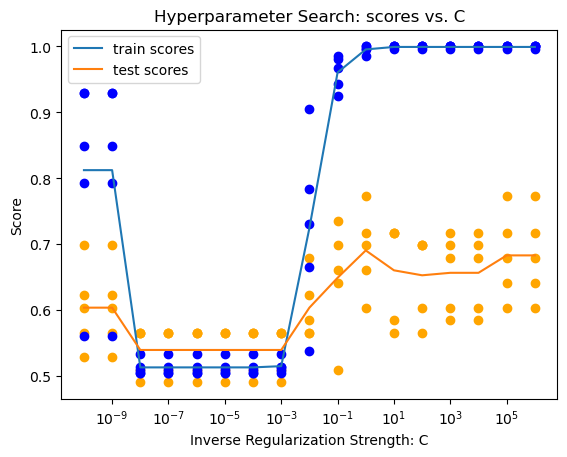

In [172]:
x =  np.logspace(-10,6,17)
plt.plot(x, train_scores, label="train scores")
plt.plot(x, test_scores, label="test scores")
plt.scatter(x, test_split0, color="orange")
plt.scatter(x, test_split1, color="orange")
plt.scatter(x, test_split2, color="orange")
plt.scatter(x, test_split3, color="orange")
plt.scatter(x, test_split4, color="orange")
plt.scatter(x, train_split0, color="blue")
plt.scatter(x, train_split1, color="blue")
plt.scatter(x, train_split2, color="blue")
plt.scatter(x, train_split3, color="blue")
plt.scatter(x, train_split4, color="blue")
plt.legend()
plt.title("Hyperparameter Search: scores vs. C")
plt.xlabel("Inverse Regularization Strength: C")
plt.ylabel("Score")
plt.xscale('log')
plt.show()

In [173]:
# train logistic regression with the selected best params
classifier = LogisticRegression(C=search.best_params_["C"], tol=search.best_params_["tol"], solver=search.best_params_["solver"]) 
classifier.fit(x_train_NV, y_train_df.values.ravel())

# save classifiers to pkl files
with open('testing.pkl','wb') as f:
    pickle.dump(classifier,f)

In [174]:

y_train_df = np.array(y_train_df)
y_train_df.shape
y_train_df = y_train_df.reshape((2400,))
print(y_train_df.shape)

(2400,)


In [175]:
print(x_train_df.to_numpy().shape)
print(x_train_NV.shape)

(2400, 2)
(2400, 4255)


In [176]:
K = 5
        
cv_train_err_list = []
cv_valid_err_list = []
# pipeline = sklearn.pipeline.Pipeline(
#     steps = [('Log regr', LogisticRegression(C= 1e-10, penalty='l1', tol=1e-7))])

#y_train_df = np.array(y_train_df)
length = 2400
split = 0.8
split_spot = 1920
rand_indicies = np.random.permutation(length)
x_train_array = x_train_df.to_numpy()
x_train_text = x_train_array[rand_indicies]
x_train_NV = x_train_NV[rand_indicies]
y_train_df = y_train_df[rand_indicies]

x_train_split = x_train_NV[0:split_spot]
y_train_split = y_train_df[0:split_spot]
x_test_split = x_train_NV[split_spot:2400]
y_test_split = y_train_df[split_spot:2400]

pipeline = LogisticRegression(C= 0.1, penalty='l2', tol=1e-5)

pipeline.fit(x_train_split, y_train_split)

preds = pipeline.predict(x_test_split)

In [185]:
false_positives = np.intersect1d(np.where(preds == 1)[0], np.where(y_test_split == 0)[0]) + 1920
false_negatives = np.intersect1d(np.where(preds == 0)[0], np.where(y_test_split == 1)[0]) + 1920
print(false_negatives)
# print(len(false_positives))
# print(x_train_df.shape)
# for idx in false_negatives:
#     print(x_train_df[idx])
for idx in false_negatives:
    print(x_train_text[idx])
    print(y_train_df[idx])
    print(preds[idx - 1920])

[1932 1933 1937 1960 1961 1964 1967 1969 1975 1989 1990 1998 2000 2002
 2009 2014 2031 2033 2035 2051 2053 2055 2056 2066 2071 2078 2081 2085
 2086 2097 2099 2100 2104 2106 2107 2108 2112 2117 2127 2137 2144 2152
 2180 2189 2193 2198 2200 2217 2220 2225 2226 2232 2233 2234 2243 2252
 2255 2261 2265 2274 2277 2279 2292 2294 2301 2317 2319 2326 2328 2338
 2344 2353 2359 2366 2376 2378 2380 2389 2396 2397]
['amazon'
 'The pairing of the two devices was so easy it barely took a couple minutes before I started making calls with the voice dialing feature.']
1
0
['amazon' 'So I bought about 10 of these and saved alot of money.']
1
0
['yelp'
 "I don't have very many words to say about this place, but it does everything pretty well."]
1
0
['amazon' 'The cutouts and buttons are placed perfectly.']
1
0
['amazon' 'We have gotten a lot of compliments on it.']
1
0
['yelp' 'I found this place by accident and I could not be happier.']
1
0
['imdb' 'I liked this movie way too much.  ']
1
0
['yelp' 'Much

In [186]:
# print(len(false_positives))
# print(x_train_df.shape)
# for idx in false_negatives:
#     print(x_train_df[idx])
for idx in false_positives:
    print(x_train_text[idx])
    print(y_train_df[idx])
    print(preds[idx - 1920])

['yelp'
 'He was extremely rude and really, there are so many other restaurants I would love to dine at during a weekend in Vegas.']
0
1
['yelp' 'When my order arrived, one of the gyros was missing.']
0
1
['amazon' 'Very Dissapointing Performance.']
0
1
['imdb'
 'Full of unconvincing cardboard characters it is blandly written by Edward Chodorov, who also produced, and is surprisingly directed by Jean Negulesco from whom one would expect a great deal more.  ']
0
1
['imdb'
 'If it was to turn my nice day feeling into a night of disturbing memories than I guess he succeeded.  ']
0
1
['yelp'
 'It was attached to a gas station, and that is rarely a nice sign.']
0
1
['yelp' 'The Buffet at Bellagio was far from what I anticipated.']
0
1
['imdb'
 "The performances are not improved by improvisation, because the actors now have twice as much to worry about: not only whether they're delivering the line well, but whether the line itself is any nice.  "]
0
1
['amazon'
 'The internet access was fine

In [178]:
print(cv_train_err_list)
print(cv_valid_err_list)
# for C= 1e-10, penalty='l2', tol=1e-7
#   train_err = 0.43073043
#   valid_err = 0.52891713
# for C= 1e6, penalty='l2', tol=1e-7
#   train_err = 0.07053015
#   valid_err = 0.48599428
# for C= 1, penalty='l2', tol=1e-3
#   train_err = 0.19003116
#   valid_err = 0.44722232
# for C= 10-5, penalty='l2', tol=1e-1
#   train_err = 0.12028722
#   valid_err = 0.4509112

[]
[]
